<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Adaboost_hyperparam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
np.random.seed(43)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=43)

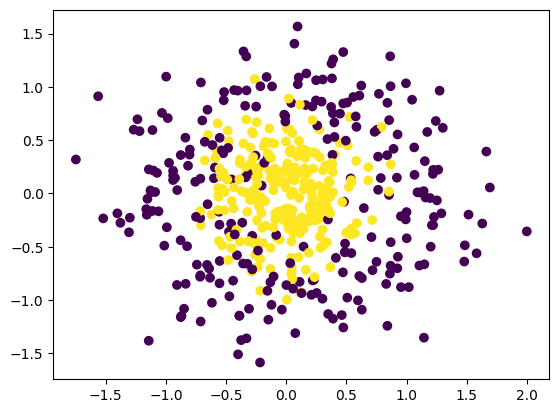

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [6]:
abc=AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.8380000000000001

In [7]:
abc.fit(X,y)

AdaBoostClassifier()

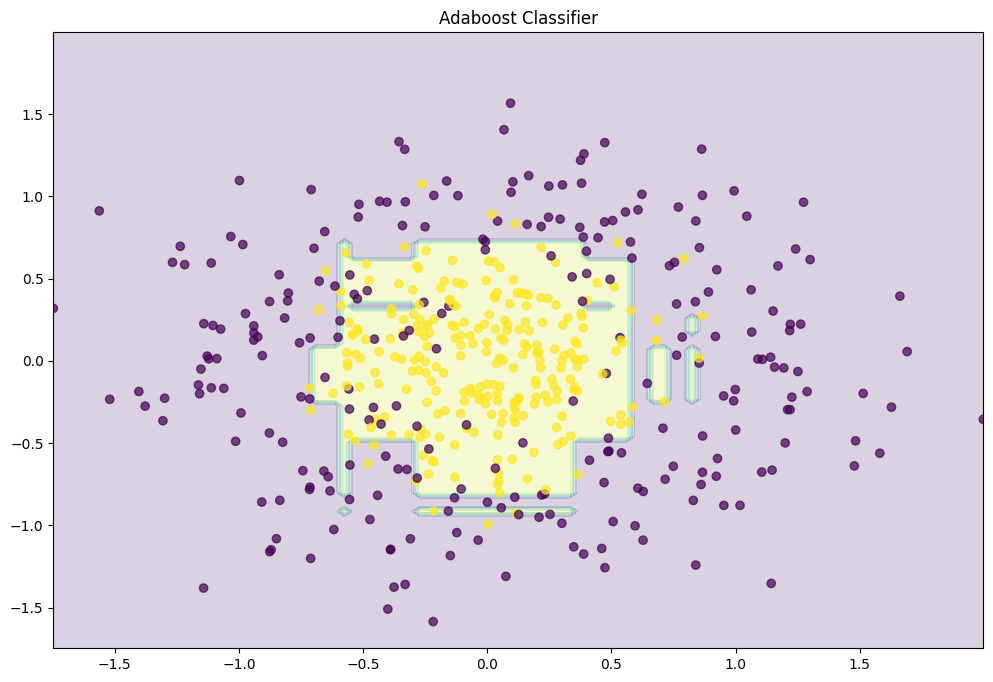

In [8]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(abc)

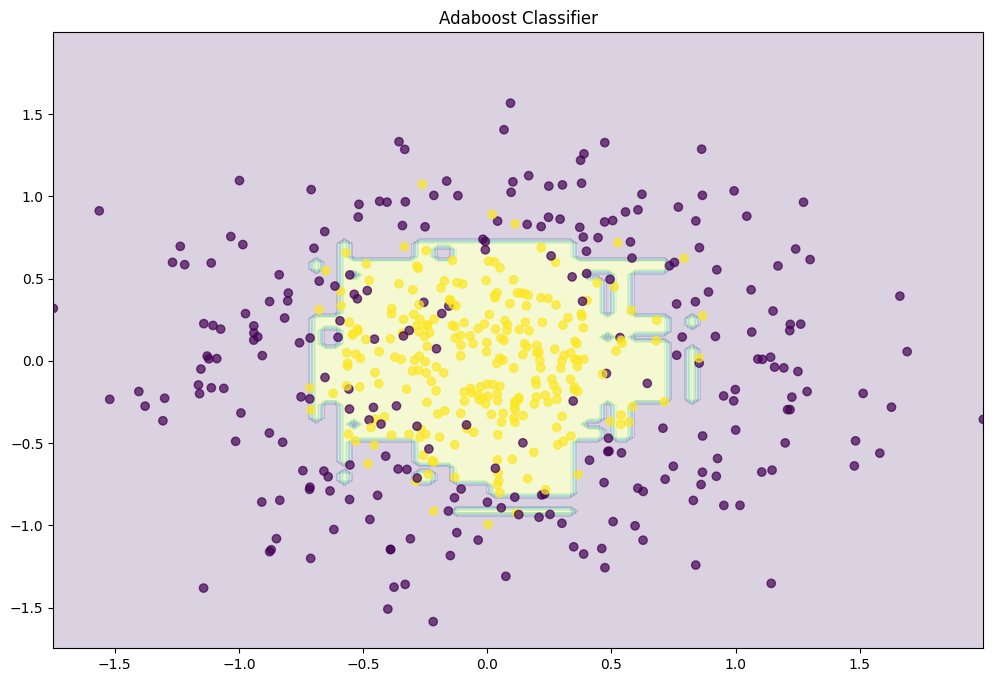

In [9]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [13]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10,20,50,100,500]
grid['learning_rate']=[0.1,0.4,0.6,1.0]
grid['algorithm']=['SAMME','SAMME.R']
grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,verbose=2,cv=10,scoring='accuracy')
grid_res=grid_search.fit(X,y)
print(grid_res.best_params_ , grid_res.best_score_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.6, 'n_estimators': 10} 0.866
